In [1]:
# Importēt palīgfunkcijas un bibliotēkas

from helpers import parse_gz_files, top_10_predicates

In [2]:
# Iegūt četriniekus klasei School 2024., 2022. un 2019. gadu datu kopās

school_quads = {}
school_quads["2024"] = parse_gz_files(["../school_2024.gz"], "School")
school_quads["2022"] = parse_gz_files(["../school_2022.gz"], "School")
school_quads["2019"] = parse_gz_files(["../school_2019.gz"], "School")


Top 10 predikāti 2024:
<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> 270931 100.0%
<http://schema.org/url> 149566 55.2%
<http://schema.org/address> 119650 44.16%
<http://schema.org/logo> 81333 30.02%
<http://schema.org/contactPoint> 67313 24.85%
<http://schema.org/location> 52611 19.42%
<http://schema.org/image> 44006 16.24%
<http://schema.org/telephone> 37546 13.86%
<http://schema.org/sameAs> 31648 11.68%
<http://schema.org/geo> 22362 8.25%


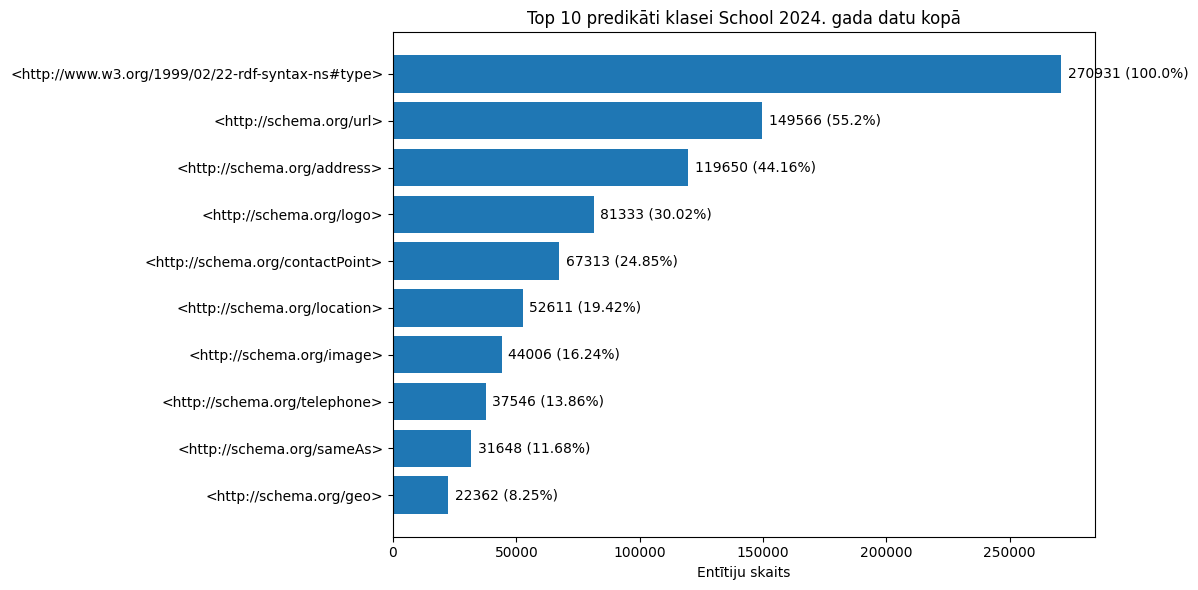


Top 10 predikāti 2022:
<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> 364910 100.0%
<http://schema.org/address> 154227 42.26%
<http://schema.org/url> 147893 40.53%
<http://schema.org/logo> 80081 21.95%
<http://schema.org/image> 60607 16.61%
<http://schema.org/sameAs> 58745 16.1%
<http://schema.org/contactPoint> 55855 15.31%
<http://schema.org/location> 46935 12.86%
<http://schema.org/name> 29695 8.14%
<http://schema.org/telephone> 25479 6.98%


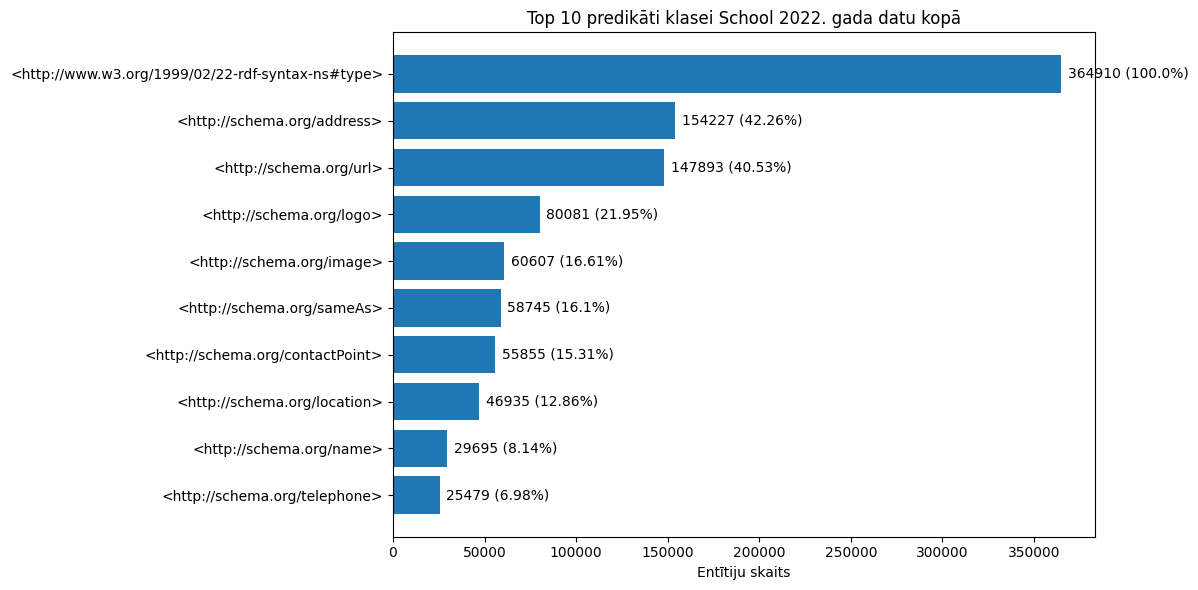


Top 10 predikāti 2019:
<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> 128588 100.0%
<http://schema.org/School/url> 34621 26.92%
<http://www.w3.org/1999/xhtml/microdata#item> 27216 21.17%
<http://schema.org/School/name> 22125 17.21%
<http://schema.org/School/image> 16279 12.66%
<http://schema.org/School/logo> 11076 8.61%
<http://schema.org/Review/itemReviewed> 8994 6.99%
<http://schema.org/School/alternateName> 8226 6.4%
<http://schema.org/School/telephone> 6853 5.33%
<http://schema.org/Person/url> 6184 4.81%


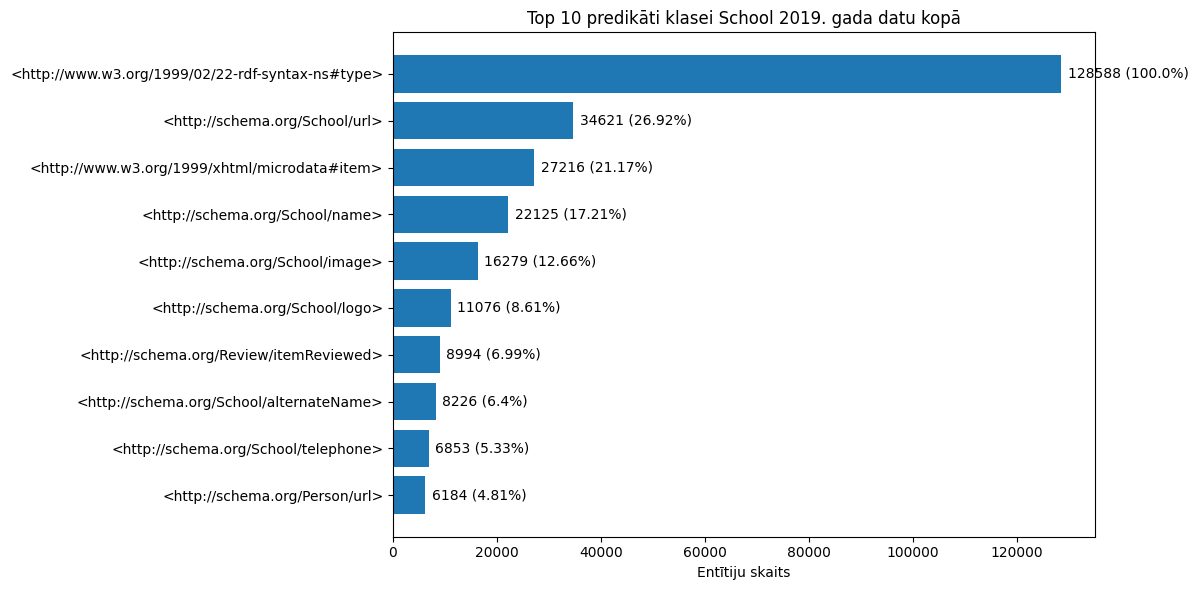

In [3]:
top_10_predicates(school_quads, 'School')